In [1]:
#Flight Delay Analysis and Prediction

In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\sahit\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\sahit\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
import shap
import warnings
warnings.filterwarnings('ignore')

In [4]:
from IPython.display import display, HTML

def print_color(text, color="blue"):
    display(HTML(f"<div style='color: {color}; font-weight: bold; font-size: 16px'>{text}</div>"))

In [5]:
# Loading dataset
df = pd.read_csv("Airline_Delay_Cause.csv")
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [6]:
print(df.columns.tolist())

['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']


In [7]:
#  Filtering extreme outliers 
df = df[df['arr_delay'] <= 1000]

#  Creating Is_Delayed column 
df['Is_Delayed'] = (df['arr_delay'] > 15).astype(int)

#  Droping rows with NA values
df.dropna(subset=['arr_delay', 'Is_Delayed'], inplace=True)

print("Remaining rows:", df.shape[0])
print(df[['arr_delay', 'Is_Delayed']].head())

Remaining rows: 94347
   arr_delay  Is_Delayed
0      672.0           1
1      348.0           1
2      859.0           1
3       75.0           1
5      325.0           1


In [9]:
# Droping rows with missing delay values
df.dropna(subset=['arr_delay', 'Is_Delayed'], inplace=True)

# Converting Is_Delayed to int
df['Is_Delayed'] = df['Is_Delayed'].astype(int)
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Is_Delayed
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.0,...,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0,1
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.0,...,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0,1
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.0,...,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0,1
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.0,...,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0,1
5,2023,12,9E,Endeavor Air Inc.,ATW,"Appleton, WI: Appleton International",56.0,7.0,3.00,1.0,...,1.79,0.0,2.0,325.0,168.0,28.0,46.0,0.0,83.0,1


In [10]:
#EDA
print("Shape of Dataset:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Shape of Dataset: (94347, 22)

Missing Values:
 year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights              0
arr_del15              250
carrier_ct               0
weather_ct               0
nas_ct                   0
security_ct              0
late_aircraft_ct         0
arr_cancelled            0
arr_diverted             0
arr_delay                0
carrier_delay            0
weather_delay            0
nas_delay                0
security_delay           0
late_aircraft_delay      0
Is_Delayed               0
dtype: int64

Summary Statistics:
                year         month   arr_flights     arr_del15    carrier_ct  \
count  94347.000000  94347.000000  94347.000000  94097.000000  94347.000000   
mean    2019.651796      6.514314     58.079981      7.110227      2.802941   
std        2.282747      3.503234     58.732625      5.681826      2.806673   
min    

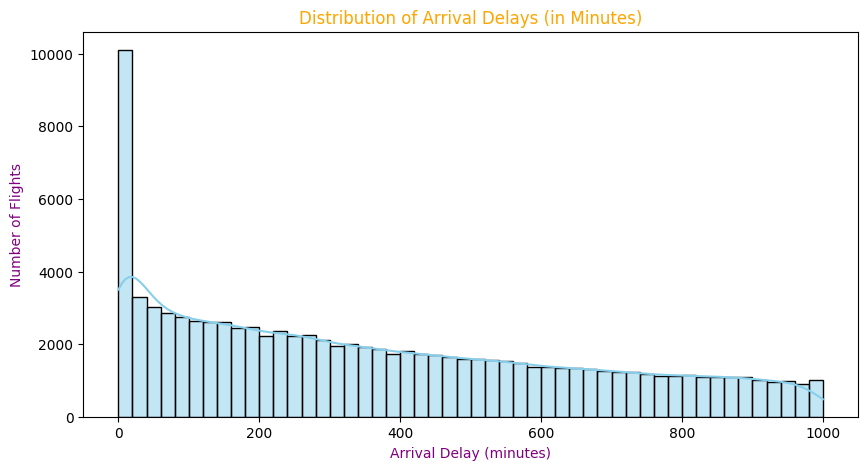

In [11]:
# Arrival delays
plt.figure(figsize=(10, 5))
sns.histplot(df['arr_delay'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Arrival Delays (in Minutes)",color="orange")
plt.xlabel("Arrival Delay (minutes)",color="purple")
plt.ylabel("Number of Flights",color="purple")
plt.show()

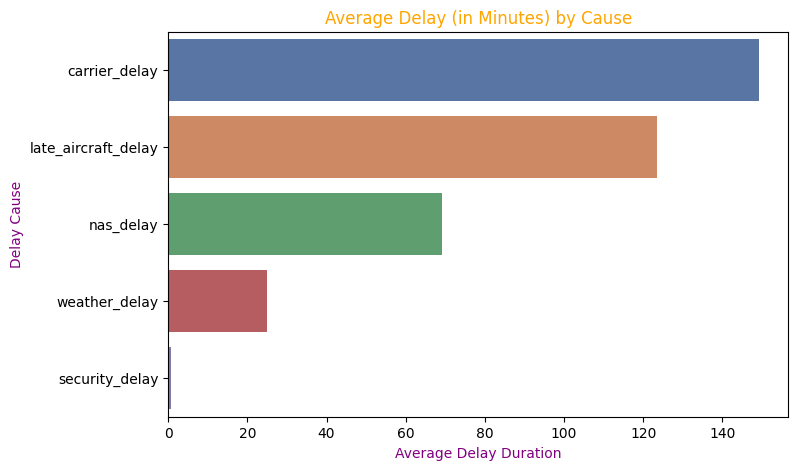

In [12]:
# Common delay causes
delay_causes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

avg_delay_by_cause = df[delay_causes].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_delay_by_cause.values, y=avg_delay_by_cause.index, palette='deep')
plt.title("Average Delay (in Minutes) by Cause",color="orange")
plt.xlabel("Average Delay Duration",color="purple")
plt.ylabel("Delay Cause",color="purple")
plt.show()


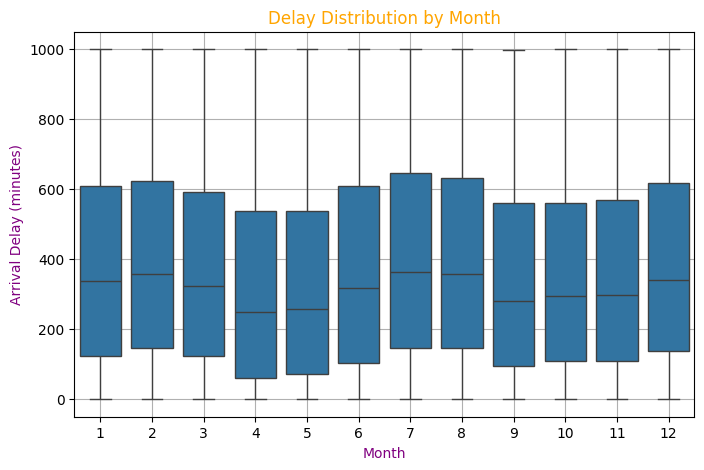

In [13]:
#Temporal patterns
plt.figure(figsize=(8, 5))
sns.boxplot(x='month', y='arr_delay', data=df)
plt.title("Delay Distribution by Month",color="orange")
plt.xlabel("Month",color="purple")
plt.ylabel("Arrival Delay (minutes)",color="purple")
plt.grid(True)
plt.show()

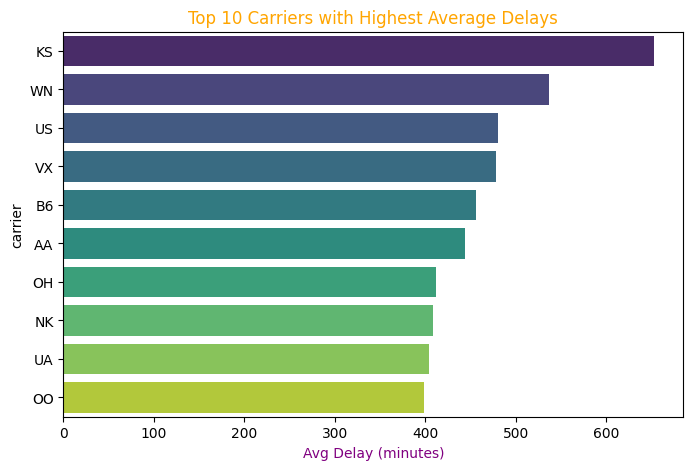

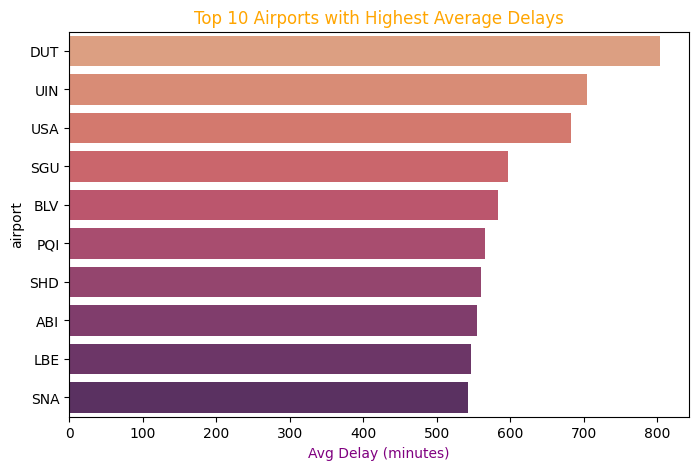

In [14]:
# Top 10 carriers by mean delay
top_carriers = df.groupby('carrier')['arr_delay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_carriers.values, y=top_carriers.index, palette='viridis')
plt.title("Top 10 Carriers with Highest Average Delays",color="orange")
plt.xlabel("Avg Delay (minutes)",color="purple")
plt.show()

# Top 10 airports by delay
top_airports = df.groupby('airport')['arr_delay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_airports.values, y=top_airports.index, palette='flare')
plt.title("Top 10 Airports with Highest Average Delays",color="orange")
plt.xlabel("Avg Delay (minutes)",color="purple")
plt.show()


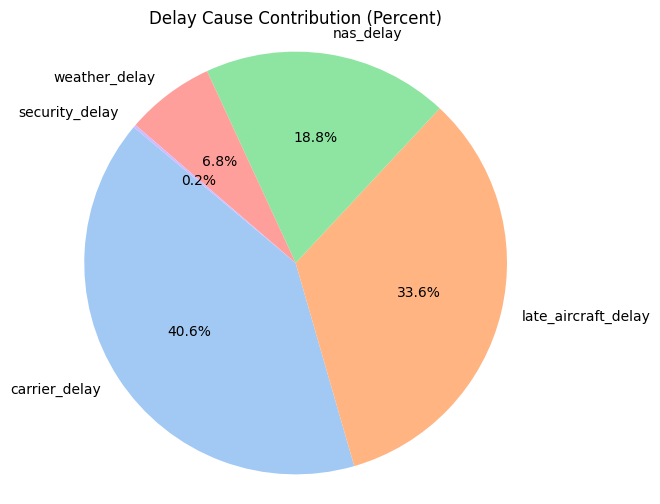

In [17]:
delay_cause_cols = [ 'carrier_delay', 'weather_delay', 'nas_delay','security_delay', 'late_aircraft_delay']
cause_sums = df[delay_cause_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 6))
plt.pie(cause_sums, labels=cause_sums.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Delay Cause Contribution (Percent)')
plt.axis('equal')
plt.show()

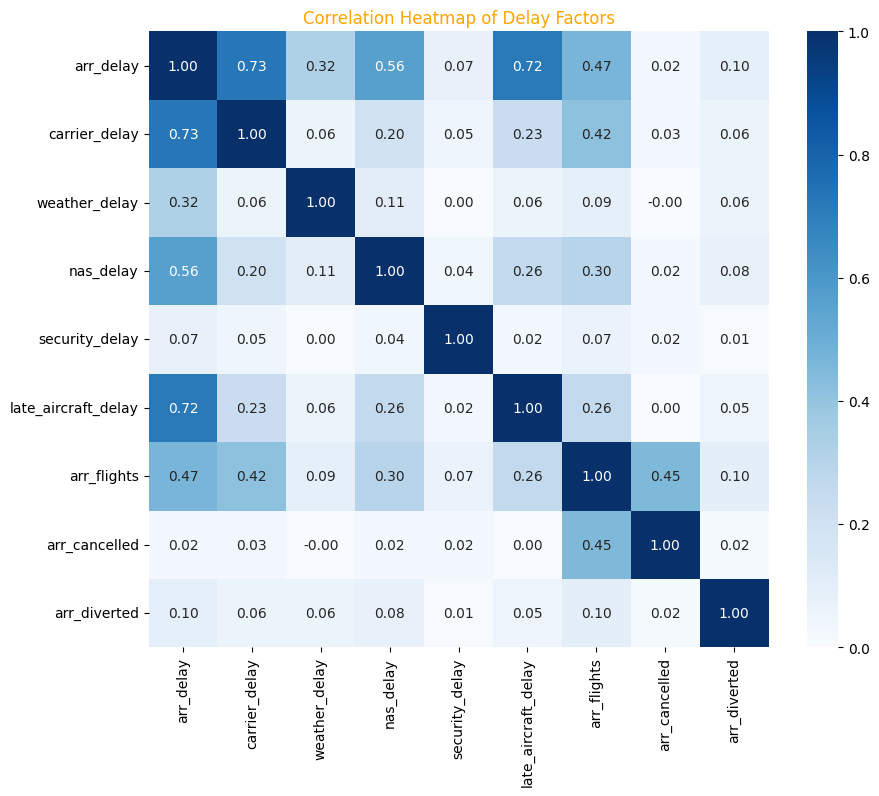

In [15]:
plt.figure(figsize=(10, 8))
corr = df[['arr_delay'] + delay_causes + ['arr_flights', 'arr_cancelled', 'arr_diverted']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap of Delay Factors",color="orange")
plt.show()

In [16]:
#Feature Engineering

features = [
    'month', 'arr_flights', 'carrier', 'airport',
    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
    'arr_cancelled', 'arr_diverted'
]

df_encoded = pd.get_dummies(df[features], columns=['carrier', 'airport'], drop_first=True)

X = df_encoded
y_cls = df['Is_Delayed']
y_reg = df['arr_delay']

print_color("Feature Matrix Preview:",color="orange")
print(X.head())

print_color("Feature Matrix Shape:",color="green")
print(X.shape)
print_color("Summary Statistics:",color="purple")
print(X.describe())


   month  arr_flights  carrier_ct  weather_ct  nas_ct  security_ct  \
0     12         72.0        2.46         1.0    0.73          0.0   
1     12         62.0        4.25         0.0    1.00          0.0   
2     12         95.0        5.94         0.0    1.06          0.0   
3     12         23.0        0.56         0.0    0.00          0.0   
5     12         56.0        3.00         1.0    1.21          0.0   

   late_aircraft_ct  arr_cancelled  arr_diverted  carrier_9K  ...  \
0              0.81            0.0           0.0       False  ...   
1              1.75            0.0           0.0       False  ...   
2              3.00            0.0           0.0       False  ...   
3              1.44            1.0           0.0       False  ...   
5              1.79            0.0           2.0       False  ...   

   airport_VLD  airport_VPS  airport_WRG  airport_WYS  airport_XNA  \
0        False        False        False        False        False   
1        False        Fa

(94347, 426)


              month   arr_flights    carrier_ct    weather_ct        nas_ct  \
count  94347.000000  94347.000000  94347.000000  94347.000000  94347.000000   
mean       6.514314     58.079981      2.802941      0.321985      1.932275   
std        3.503234     58.732625      2.806673      0.662285      2.327875   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        3.000000     25.000000      0.870000      0.000000      0.030000   
50%        6.000000     48.000000      2.000000      0.000000      1.130000   
75%       10.000000     77.000000      4.030000      0.380000      2.900000   
max       12.000000   2684.000000     32.090000     11.670000     30.090000   

        security_ct  late_aircraft_ct  arr_cancelled  arr_diverted  
count  94347.000000      94347.000000   94347.000000  94347.000000  
mean       0.018695          2.015578       1.776463      0.154631  
std        0.132421          2.242826      14.421654      0.707467  
min        0

In [17]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_cls_train, y_cls_test = train_test_split(
    X, y_cls, test_size=0.3, random_state=42)

# For regression target (same split for consistency)
_, _, y_reg_train, y_reg_test = train_test_split(
    X, y_reg, test_size=0.3, random_state=42)

# OUTPUT SECTION
from IPython.display import display, HTML

def print_color(text, color="blue"):
    display(HTML(f"<div style='color: {color}; font-weight: bold; font-size: 16px'>{text}</div>"))

print_color("Feature Matrix Shapes:", "blue")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")

print_color("Classification Label Shapes:", "purple")
print(f"y_cls_train shape: {y_cls_train.shape}")
print(f"y_cls_test shape:  {y_cls_test.shape}")

print_color("Regression Target Shapes:", "teal")
print(f"y_reg_train shape: {y_reg_train.shape}")
print(f"y_reg_test shape:  {y_reg_test.shape}")

print_color("Class Distribution in Training Set:", "orange")
print(y_cls_train.value_counts(normalize=True))


X_train shape: (66042, 426)
X_test shape:  (28305, 426)


y_cls_train shape: (66042,)
y_cls_test shape:  (28305,)


y_reg_train shape: (66042,)
y_reg_test shape:  (28305,)


Is_Delayed
1    0.904864
0    0.095136
Name: proportion, dtype: float64


In [18]:
#Creating binary label from arr_delay
df['Is_Delayed'] = (df['arr_delay'] > 15).astype(int)

print(df['Is_Delayed'].value_counts(normalize=True))


Is_Delayed
1    0.905021
0    0.094979
Name: proportion, dtype: float64


In [19]:
# CLASSIFICATION
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X_train, y_cls_train)
y_pred_cls = clf.predict(X_test)

print_color("\nCLASSIFICATION REPORT:",color="skyblue")
print(classification_report(y_cls_test, y_pred_cls))

print_color("\nCONFUSION MATRIX:",color="skyblue")
print(confusion_matrix(y_cls_test, y_pred_cls))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2678
           1       1.00      1.00      1.00     25627

    accuracy                           1.00     28305
   macro avg       1.00      0.98      0.99     28305
weighted avg       1.00      1.00      1.00     28305



[[ 2568   110]
 [    5 25622]]


In [20]:
#REGRESSION
# Training regression model on a sample
X_sample = X_train.sample(n=10000, random_state=42)
y_sample = y_reg_train.loc[X_sample.index]

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_sample, y_sample)

# Prediction and evaluation
y_pred_reg = reg.predict(X_test)

print_color("REGRESSION METRICS:",color="skyblue")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_reg_test, y_pred_reg))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_reg_test, y_pred_reg)))


Mean Absolute Error (MAE): 92.66201558421167
Root Mean Squared Error (RMSE): 135.88966671797814


In [21]:

df['OAI_weight'] = df['carrier_delay'] + df['late_aircraft_delay']

#  Downsampling to 5000 rows 
df = df.sample(n=5000, random_state=42).reset_index(drop=True)

#  Feature Encoding
features = [
    'month', 'arr_flights', 'carrier', 'airport',
    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
    'arr_cancelled', 'arr_diverted'
]
X = pd.get_dummies(df[features], columns=['carrier', 'airport'], drop_first=True)
y = df['arr_delay']
oai = df['OAI_weight']

#  Train-Test Split 
X_train, X_test, y_train, y_test, oai_train, oai_test = train_test_split(
    X, y, oai, test_size=0.3, random_state=42
)

#  Training RandomForest with OAI weights 
reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
reg.fit(X_train, y_train, sample_weight=oai_train)

#  Prediction and Evaluation
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
oai_mae = np.mean(np.abs(y_test - y_pred) * oai_test)

print("\nOAI-AWARE REGRESSION RESULTS:")
print(f"Standard MAE: {mae:.2f} minutes")
print(f"Standard RMSE: {rmse:.2f} minutes")
print(f"OAI-weighted MAE: {oai_mae:.2f}")



OAI-AWARE REGRESSION RESULTS:
Standard MAE: 115.14 minutes
Standard RMSE: 140.99 minutes
OAI-weighted MAE: 33486.78


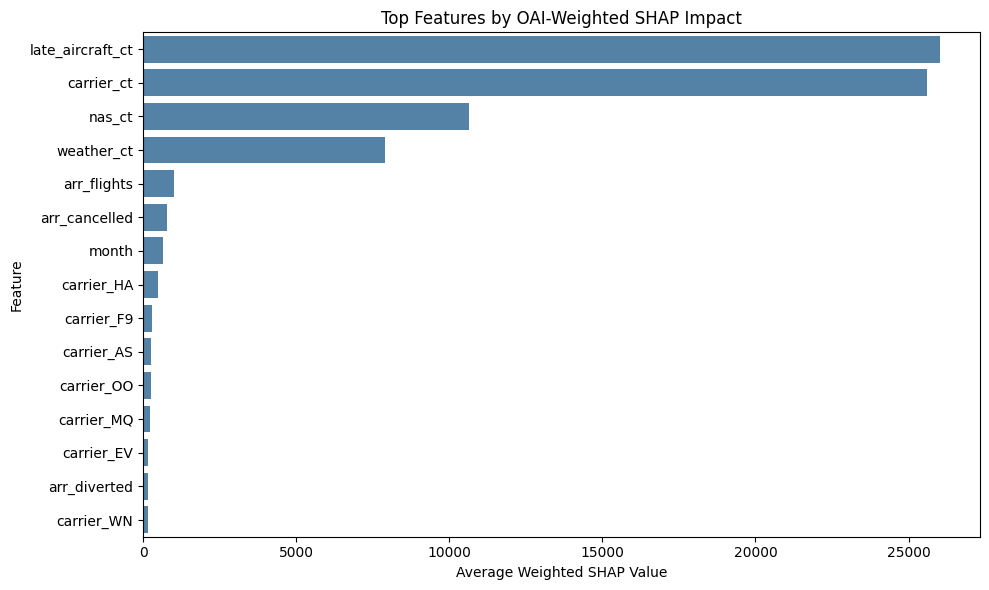

In [22]:
# SHAP Analysis on 1000-row sample
sample_idx = np.random.choice(X_test.index, size=1000, replace=False)
X_sample = X_test.loc[sample_idx]
oai_sample = oai_test.loc[sample_idx]

# Using TreeExplainer for RandomForest
explainer = shap.TreeExplainer(reg)
shap_values = explainer.shap_values(X_sample)

# OAI-weighted SHAP importance
shap_matrix = np.abs(shap_values) * oai_sample.values.reshape(-1, 1)
mean_weighted_shap = shap_matrix.mean(axis=0)

# Plot
shap_df = pd.DataFrame({
    'Feature': X_sample.columns,
    'OAI_Weighted_Impact': mean_weighted_shap
}).sort_values(by='OAI_Weighted_Impact', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=shap_df.head(15), x='OAI_Weighted_Impact', y='Feature', color='steelblue')
plt.title("Top Features by OAI-Weighted SHAP Impact")
plt.xlabel("Average Weighted SHAP Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Accuracy: 0.9986666666666667
Precision: 0.9985141158989599
Recall: 1.0
F1-score: 0.9992565055762082


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       156
           1       1.00      1.00      1.00      1344

    accuracy                           1.00      1500
   macro avg       1.00      0.99      1.00      1500
weighted avg       1.00      1.00      1.00      1500



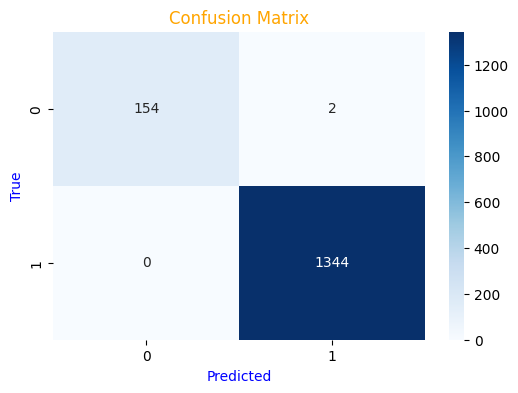

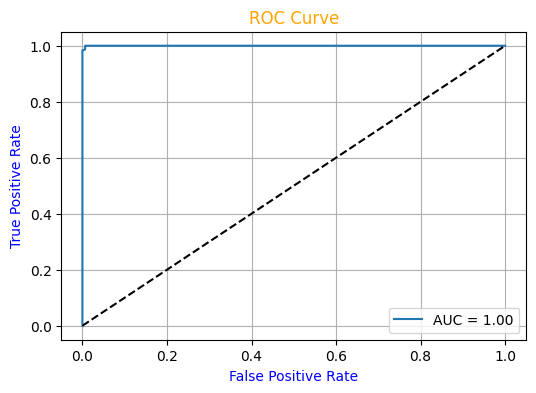

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc


# Feature set
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
X_cls = df[features]
y_cls = df['Is_Delayed']

# Train-test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

# Model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)
y_prob_cls = clf.predict_proba(X_test_cls)[:, 1]  # Probability for ROC

# Metrics
print_color("Classification Metrics:",color="purple")
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print("Precision:", precision_score(y_test_cls, y_pred_cls))
print("Recall:", recall_score(y_test_cls, y_pred_cls))
print("F1-score:", f1_score(y_test_cls, y_pred_cls))
print_color("\nClassification Report:\n",color="purple")
print(classification_report(y_test_cls, y_pred_cls))

# Confusion Matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix",color="orange")
plt.xlabel("Predicted",color="blue")
plt.ylabel("True",color="blue")
plt.show()

# ROC & AUC
fpr, tpr, _ = roc_curve(y_test_cls, y_prob_cls)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate",color="blue")
plt.ylabel("True Positive Rate",color="blue")
plt.title("ROC Curve",color="orange")
plt.legend()
plt.grid()
plt.show()


In [25]:
# Feature set for regression
X_reg = df[features]
y_reg = df['arr_delay']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Model
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)

# Metrics
print_color("Regression Metrics:",color="purple")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))


MAE: 15.640213333333334
RMSE: 31.23621557743511


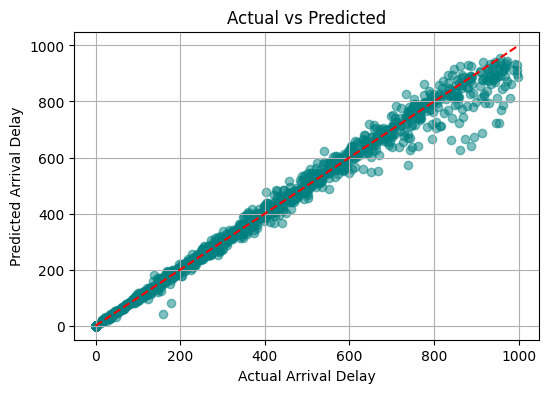

In [26]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5, color='teal')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual Arrival Delay")
plt.ylabel("Predicted Arrival Delay")
plt.grid(True)
plt.show()


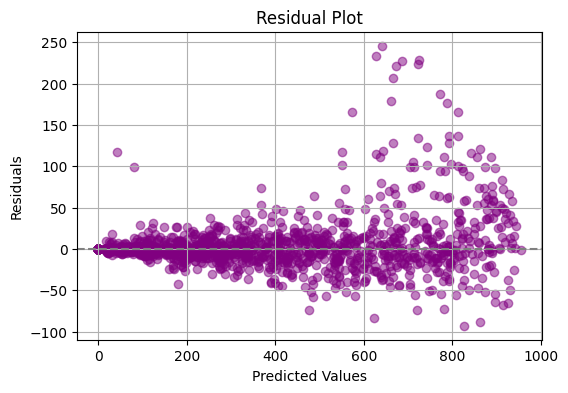

In [27]:
residuals = y_test_reg - y_pred_reg

plt.figure(figsize=(6, 4))
plt.scatter(y_pred_reg, residuals, alpha=0.5, color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()
